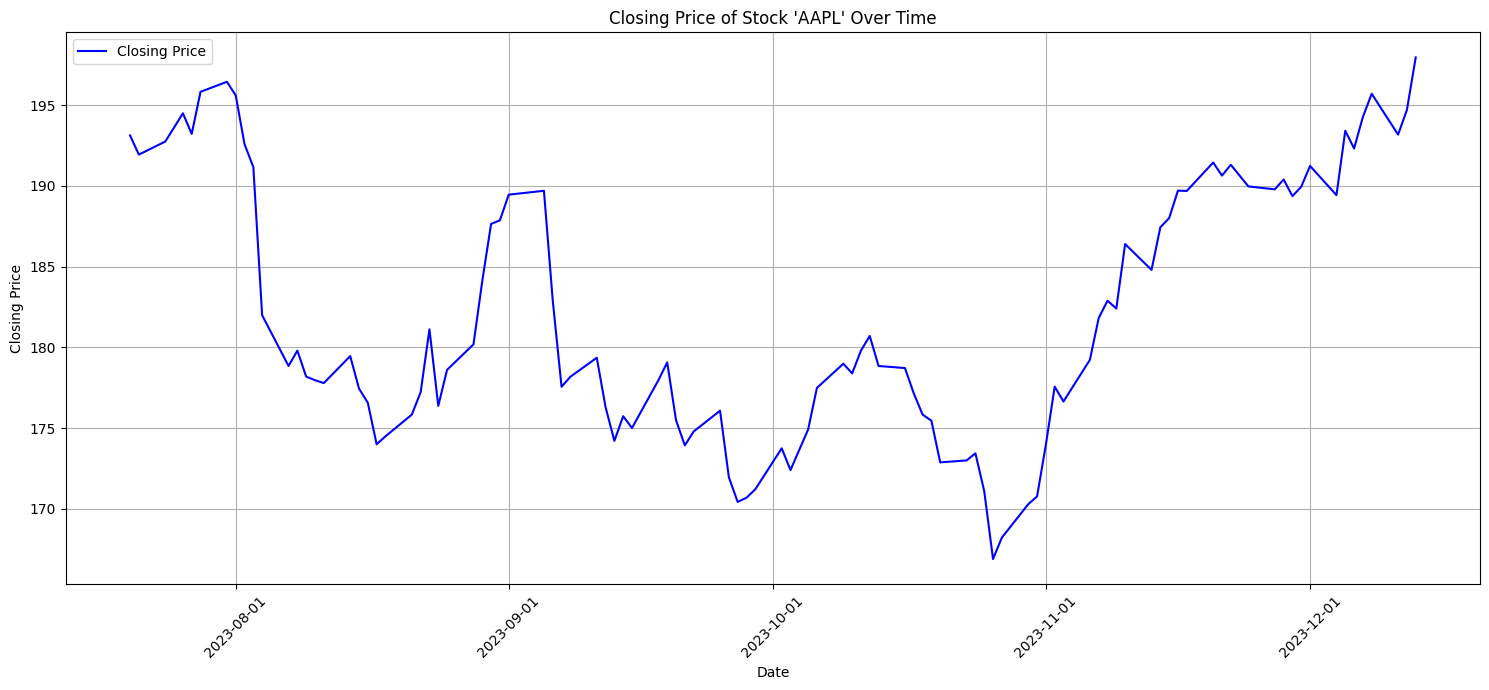

In [18]:
from google.cloud import bigquery
from google.oauth2 import service_account
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates

credentials = service_account.Credentials.from_service_account_file(
'data-finance-final-92d8049c252f.json')

project_id = 'data-finance-final'
client = bigquery.Client(credentials= credentials,project=project_id)

sql = "SELECT * FROM `data-finance-final.stockMetaData.stock_prices_cleaned`"

# Re-run the query
query_job = client.query(sql)
results = query_job.result()

# Convert results to a list
results_list = list(results)

# Convert the list of tuples to a list of lists
data_list = [list(row) for row in results_list]

# Convert the list of lists to a DataFrame with column names
column_names = ['date', 'open', 'high', 'low', 'close', 'volume', 'stock']
df = pd.DataFrame(data_list, columns=column_names)

#specify which stock you want
#stock = 'AAPL'
df = df[df['stock'] == 'AAPL']
df['date'] = pd.to_datetime(df['date'])
df['close'] = pd.to_numeric(df['close'], errors='coerce')

# Check for and handle any possible duplicates in the 'date' column
df = df.drop_duplicates(subset='date')

# Sort the DataFrame by 'date'
df = df.sort_values(by='date')

# Plotting
plt.figure(figsize=(15, 7))  # Modify this as needed for your data
plt.plot(df['date'], df['close'], label='Closing Price', color='blue')

# Format the date axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

# Rotate date labels
plt.xticks(rotation=45)

plt.title(f'Closing Price of Stock \'{stock}\' Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')

plt.tight_layout()  # Adjust layout to fit the date labels
plt.legend()
plt.grid(True)
plt.show()